## Notebook to make vizualations of roster data
- created 8/26/24 by JBS

In [137]:
# SETUP

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase

# path ro TEMP folder
temp_folder = os.path.join(os.getcwd(), '..', 'TEMP')
# Data folder
data_folder = os.path.join(os.getcwd(), '..', 'data')
# Image folder
img_folder = os.path.join(os.getcwd(), '..', 'images')
# Logo folder
logo_folder = os.path.join(os.getcwd(), '..', 'images', 'logos')

# print list of files in data folder
# print(os.listdir(data_folder))
################################################################################
roster_file = os.path.join(data_folder, 'roster_2024_current_v2.csv') # PATH TO THE ROSTER FILE
roster = pd.read_csv(roster_file) # read as dataframe

# print(roster.head())
# roster.head()

### Dictionaries and Constants

In [138]:
## Conference Membership

atlantic = ['Air Force', "American Int'l", 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 
            'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart', 'St. Lawrence', 'AIC', 'Bentley', 
            'Holy Cross', 'Mercyhurst', 'RIT', 'Sacred Heart']

big_ten = ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin']

ccha = ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior State', 'Michigan Tech', 
        'Minnesota State', 'Northern Michigan', 'St. Thomas']

ecac = ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac',
        'Rensselaer', 'St. Lawrence', 'Union', 'Yale']

hockey_east = ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Massachusetts', 'Mass. Lowell',
                'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont']

nchc = ['Arizona State', 'Colorado College', 'Denver', 'Miami', 'Minnesota Duluth', 'North Dakota', 'Omaha', 'St. Cloud State',
        'Western Michigan']

independents = ['Alaska-Anchorage', 'Alaska', 'Lindenwood', 'Long Island', 'Stonehill']

#### Logo Dictionary
- Load arena info table that has logo abbreviations and convert into a dictionary called "logo_mapping"

In [139]:
# Path to school info table (csv)
school_info_file = os.path.join(data_folder, 'arena_school_info.csv')
school_info = pd.read_csv(school_info_file)

# print(school_info.head())

# Create a dictionary of {Team: logo_abv} for each team with .png added to the end
logo_mapping = {}

for index, row in school_info.iterrows():
    logo_mapping[row['Team']] = row['logo_abv'] + '.png'

print(logo_mapping)



{'Air Force': 'afa.png', 'Alaska': 'aka.png', 'Alaska-Anchorage': 'akf.png', "American Int'l": 'aic.png', 'Arizona State': 'asu.png', 'Army': 'arm.png', 'Bemidji State': 'bmj.png', 'Bentley': 'ben.png', 'Boston College': 'bc_.png', 'Boston University': 'bu_.png', 'Bowling Green': 'bgs.png', 'Brown': 'brn.png', 'Canisius': 'cns.png', 'Clarkson': 'clk.png', 'Colgate': 'clg.png', 'Colorado College': 'cc_.png', 'Connecticut': '_con.png', 'Cornell': 'cor.png', 'Dartmouth': 'dar.png', 'Denver': 'den.png', 'Ferris State': 'fsu.png', 'Harvard': 'har.png', 'Holy Cross': 'hcr.png', 'Lake Superior': 'lss.png', 'Long Island': 'liu.png', 'Mass.-Lowell': 'uml.png', 'Massachusetts': 'uma.png', 'Mercyhurst': 'mrc.png', 'Merrimack': 'mer.png', 'Miami': 'mia.png', 'Michigan': 'mic.png', 'Michigan State': 'msu.png', 'Michigan Tech': 'mtu.png', 'Minnesota': 'min.png', 'Minnesota State': 'mns.png', 'Minnesota-Duluth': 'mnd.png', 'New Hampshire': 'unh.png', 'Niagara': 'nia.png', 'North Dakota': 'ndk.png', '

### Data Modifications

In [140]:
team_roster = roster.copy()

## NO LONGER NEEDED ############
# # Replace - with ' ' in team column
# team_roster['Current Team'] = team_roster['Current Team'].str.replace('-', ' ')

# Add a 'Season' column to the roster dataframe so I can use code written last season
team_roster['Season'] = 2024

# Convert the DOB to datetime
# If DOB is not in an appro datetime format drop the row
team_roster['DOB'] = pd.to_datetime(team_roster['DOB'], errors='coerce')
# team_roster['DOB'] = pd.to_datetime(team_roster['DOB'])
# Calculate Player Age in Years at the start of the season (Oct 1, Season), store as float of years
team_roster['Age'] = (team_roster['Season'] + 1) - team_roster['DOB'].dt.year



# team_roster.tail()
# GroupBy Season and Calculate the average age of each team each year and save as a dataframe
team_avg_age = team_roster.groupby('Current Team')['Age'].mean().reset_index()
# Rename Current Team to Team
team_avg_age.rename(columns={'Current Team': 'Team'}, inplace=True)
# team_avg_age.head(40)

# Get a player count by season
player_count = team_roster.groupby('Current Team')['Last_Name'].count().reset_index()
# Rename Current Team to Team
player_count.rename(columns={'Current Team': 'Team', 'Last_Name': 'Player_Count'}, inplace=True)
# player_count.head(10)

# team_avg_age

## Calculate Roster Makeup by Class 

In [141]:
# Get a count of each class rank by team

# Create a pivot table of the class rank count
class_rank_count = team_roster.pivot_table(index='Current Team', columns='Yr', values='Last_Name', aggfunc='count', fill_value=0).reset_index()

# Calculate the total number of players on each team
class_rank_count['Total'] = class_rank_count['Fr'] + class_rank_count['So'] + class_rank_count['Jr'] + class_rank_count['Sr'] + class_rank_count['Gr']

# # Reorder the columns
# class_rank_count = class_rank_count[['Season', 'Current Team', 'Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']]
# # Convert the columns to int (0 for Nan)
# class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']] = class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']].fillna(0).astype(int)

# ## Add the average age to the class_rank_count
# # class_rank_count = class_rank_count.merge(team_avg_age, on='Season', how='left')


# Calculate the percentage of each class rank
class_rank_count['Fr%'] = class_rank_count['Fr'] / class_rank_count['Total']
class_rank_count['So%'] = class_rank_count['So'] / class_rank_count['Total']
class_rank_count['Jr%'] = class_rank_count['Jr'] / class_rank_count['Total']
class_rank_count['Sr%'] = class_rank_count['Sr'] / class_rank_count['Total']
class_rank_count['Gr%'] = class_rank_count['Gr'] / class_rank_count['Total']

# Reorder Columns
class_rank_count = class_rank_count[['Current Team', 'Fr', 'Fr%', 'So', 'So%', 'Jr', 'Jr%', 'Sr', 'Sr%', 'Gr', 'Gr%', 'Total']]

# class_rank_count.tail(10)

## Simple Distribution of Heights and weights

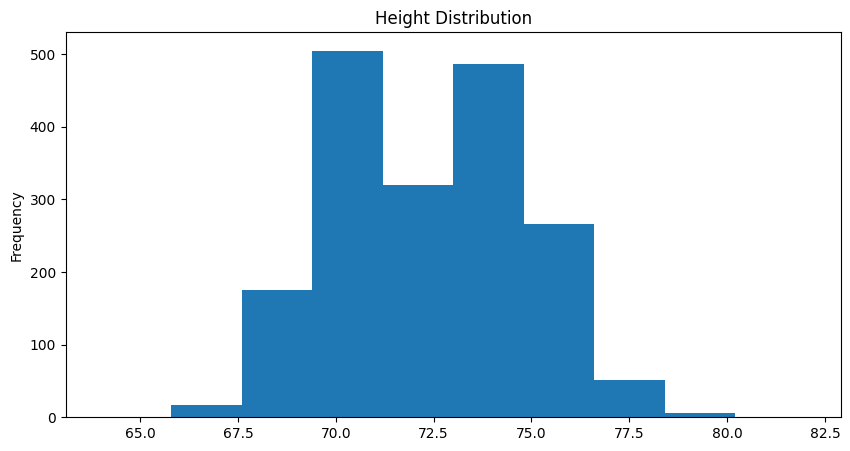

In [142]:
### Create histograme plots of the various player physical properties


## Height Distribution
# Set Randge of the histogram
plt.figure(figsize=(10, 5))
max_height = roster['Height_Inches'].max()
# set min for plot to 20 inches unter the max height
min_height = max_height - 20
# Filer out players outside of the range
roster = roster[(roster['Height_Inches'] >= min_height) & (roster['Height_Inches'] <= max_height)]

plt.hist(roster['Height_Inches'], bins=50, color='blue')
# drop rows with missing values
roster = roster.dropna(subset=['Height_Inches'])
roster['Height_Inches'].plot(kind='hist', title='Height Distribution')
plt.show()

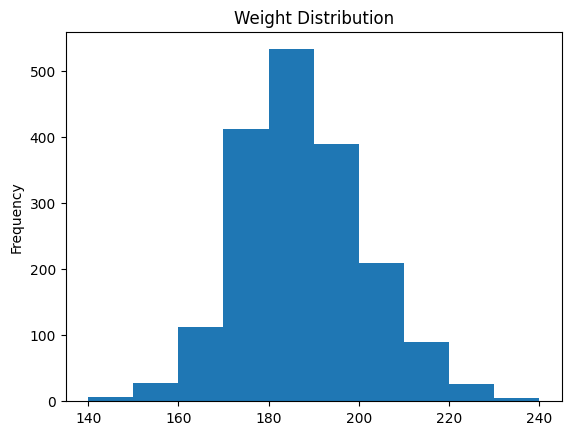

In [143]:
### Weight Distribution
# Set Randge of the histogram
# plt.figure(figsize=(10, 5))


# drop rows with missing values
roster = roster.dropna(subset=['Wt'])
max_weight = roster['Wt'].max()
# set min for plot to 150 lbs of the max weight
min_weight = max_weight - 150
# Filer out players outside of the range
roster = roster[(roster['Wt'] >= min_weight) & (roster['Wt'] <= max_weight)]

## Increase the number of bins to 100
plt.hist(roster['Wt'], bins=50, color='blue')



roster['Wt'].plot(kind='hist', title='Weight Distribution')
plt.show()



## Conference Comparison Charts
- Adapting style created during 2023 NCAA tourney

#### Formatting Options and Settings

In [144]:
## Formatting constants
position_order = ['Forwards', 'Defensemen', 'Goaltenders'] # Set the order of the positions
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr'] # Set the order of Class Rank

###### SETTINGS ######
zoom_factor = 0.25
y_offset = 1.1
age_offset = -.125
age_fontsize = 12
figure_size = (10, 10)

### Global Settings
set_linewidth = 1
all_color='lightgrey'




## FONT PARAMETERS
font_path = 'C:/Windows/Fonts/Exo 2.tff'

font = "Exo 2"

font_title_param = {f'family': {font}, 'color': 'black', 'weight': 'normal', 'size': 16}
font_label_param = {f'family': {font}, 'color': 'black', 'weight': 'normal', 'size': 14}
font_tick_param = {f'family': {font}, 'color': 'black', 'weight': 'normal', 'size': 8}
font_label_large_param = {'family': {font}, 'color': 'black', 'weight': 'normal', 'size': 16}
font_tick_large_param = {f'family': {font}, 'color': 'black', 'weight': 'normal', 'size': 12}

font_tag_parm = {f'family': 'CMU Sans Serif', 'color': 'black', 'weight': 'bold', 'size': 10}
font_tag_parm_2 = {f'family': {font}, 'color': 'black', 'weight': 'bold', 'size': 12}

In [145]:
### *** HOTFIX - Rename Current Team to Team ***
roster.rename(columns={'Current Team': 'Team'}, inplace=True)
roster.head()

roster_df = roster.copy()



#### Functions



##### Logo Mapping and Team Age Calculation

In [146]:
# Calculate average age for each team in the pairwise rankings
roster_df['DOB'] = pd.to_datetime(roster_df['DOB'])
# Calulate each players age in days
roster_df['Age'] = (pd.Timestamp.now() - roster_df['DOB']).dt.days

# Group by Team and calculate the average age for each
team_age_df = roster_df.groupby('Team')['Age'].mean().reset_index()
# Conver to years
team_age_df['Age'] = team_age_df['Age'] / 365

# roster_df.head()
team_age_df.head()


,Team,Age
0,Air Force,22.033048
1,Alaska,22.637649
2,Alaska Anchorage,22.464188
3,American Intl,22.377994
4,Arizona State,21.883653


In [147]:
## NEW SUB FUNCTION 3/24/24
def add_logos_to_plot(data_df, x_col, y_col, logo_mapping, logo_folder, ax, teams_in_region):
    # Plot logos for specific teams
    for team in teams_in_region:
        team_data = data_df[data_df['Team'] == team]
        if not team_data.empty:
            x = team_data[x_col].values[0]
            y = team_data[y_col].values[0]
            logo_path = os.path.join(logo_folder, logo_mapping.get(team, ""))
            if logo_path:
                try:
                    logo_img = plt.imread(logo_path)
                    imagebox = OffsetImage(logo_img, zoom=0.15)  # Adjust zoom as needed
                    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(10, 20), boxcoords="offset points", pad=0)
                    ax.add_artist(ab)  # Apply the ax here as the artist is being added to ax
                except Exception as e:
                    print(f"Error adding logo for {team}: {e}")



##### plot_team_ages_and_experience_with_logos - Original from FF Last Season 
- USAGE: (roster dataframe, team dictionary[f'(team dictionary)'], f'{team dictionary}', logo_mapping, logo_folder, pairwise_df)

In [148]:

def plot_team_ages_and_experience_with_logos(roster_df, team_names, region_name, logo_mapping, logo_folder, figure_size=(10, 10)):
    """
    Plots a stacked bar chart comparing the age and experience of hockey teams, using team logos for x-axis labels.
    
    Parameters:
    - roster_df: DataFrame containing the team rosters.
    - team_names: List of the team names to be included in the plot.
    - region_name: The name of the region for the title of the plot.
    - logo_mapping: Dictionary mapping team names to logo image filenames.
    - logo_folder: Path to the folder containing the logo images.
    - figure_size: Tuple indicating the figure size.
    """
    
    # Process data as before
    # filtered_df = roster_df[roster_df['Team'].isin(team_names)]
    correct_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']
    # Reverse the order of the ranks
    # correct_order.reverse()
    class_counts = roster_df.groupby(['Team', 'Yr'])['Last_Name'].count().unstack().fillna(0)
    class_proportions = class_counts.div(class_counts.sum(axis=1), axis=0)
    available_ranks = [rank for rank in correct_order if rank in class_proportions.columns]
    class_proportions_corrected = class_proportions[available_ranks]
    
    # Merge the class proportions with pairwise_df to get the ranks
    class_proportions_corrected_with_rank = class_proportions_corrected.merge(roster_df, left_on='Team', right_on='Team')
    
    # Sort the dataframe by rank
    # class_proportions_sorted = class_proportions_corrected_with_rank.sort_values('Rk')
    
    class_proportions_sorted = class_proportions_corrected_with_rank.sort_values('Yr')
    
    # Update team_names list based on sorted order
    team_names_sorted = class_proportions_sorted['Team'].tolist()

    # Create the plot with the sorted dataframe
    fig, ax = plt.subplots(figsize=figure_size)
    bars = class_proportions_sorted[available_ranks].plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
    ax.set_title(f'Age and Experience Comparison - {region_name}')
    ax.set_xlabel('Teams')
    ax.set_ylabel('Proportion of Players (%)')

    # # ORIGINAL LEGEND CODE
    ax.legend(title='Class Rank', fontsize=16).set_draggable(True)
    # Reverse the order in the legend to match the bars
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title='Class Rank', fontsize=16, loc='lower center').set_draggable(True)

    # Create a custom legend
    # Reverse the order in the legend to match the bars
    # handles, labels = ax.get_legend_handles_labels()
    # # Create the legend with a horizontal layout (ncol=len(handles)) and place it on top of the plot under the title
    # # Adjust the 'bbox_to_anchor' values to position the legend exactly where you want it
    # ax.legend(reversed(handles), reversed(labels), title='Class Rank', fontsize=16, loc='upper center', ncol=len(handles), frameon=False, bbox_to_anchor=(0.5, 1.05))


    # Iterate through the patches (bars) to add the text annotations
    for bar in bars.patches:
        # Get the bar's height, width, and position
        height = bar.get_height()
        width = bar.get_width()
        x, y = bar.get_xy()
        # The label is set to be at 50% of the height of the bar, you can adjust it if necessary
        label_text = f'{height:.1%}'
        label_x = x + width / 2
        label_y = y + height / 2
        
        # Only add text if the bar is tall enough to fit the text
        if height > 0.05:  # 5% threshold, can be adjusted
            ax.text(label_x, label_y, label_text, ha='center', va='center', color='black', fontsize=12)


    
    ######### AXIS AND LABEL SETTINGS #########
    # Adjust the Title Properties
    ax.title.set_fontsize(20)
    # Set the x-axis Title to blank
    ax.set_xlabel('')
    # Set y-axis label to blank
    # ax.set_ylabel('')
    ax.set_ylabel('Proportion of Players (%)', fontdict=font_label_large_param)
    # Remove x-tick labels
    # ax.set_xticks([])
    ax.set_yticks([])
    
    # Add logos as x-tick labels
    for i, team in enumerate(team_names):
        if team in logo_mapping:
            file_path = os.path.join(logo_folder, logo_mapping[team])
            img = plt.imread(file_path)
            imagebox = OffsetImage(img, zoom=zoom_factor)
            ab = AnnotationBbox(imagebox, (i, 0), xycoords=('data', 'axes fraction'),
                                boxcoords="offset points", box_alignment=(0.5, y_offset), pad=0, frameon=False)
            ax.add_artist(ab)
    
        # Retrieve the average age for the team
        team_age = team_avg_age.loc[team_avg_age['Team'] == team, 'Age'].values[0]
        
        team_age_text = f'Avg Age {team_age:.2f}'  # Add "Avg Age" prefix and format the age with 2 decimal places

        # Define the x and y position for the team age text
        age_text_x = i
        age_text_y = y_offset + age_offset  # You can adjust age_offset to move the text up or down

        # Add the age text to the plot
        ax.text(age_text_x, age_text_y, team_age_text, ha='center', va='center', fontsize=age_fontsize, weight='bold', 
                transform=ax.get_xaxis_transform())

    # Save the plot to TEMP_FOLDER
    plot_path = f'{temp_folder}{region_name}_age_experience_plot.png'
    plt.savefig(plot_path, bbox_inches='tight')
        

    plt.show()

##### Filter roster for each conference

In [149]:
### Filter the Roster to only include teams in the Each Conference
## Atlantic Hockey
atlantic_roster = roster_df[roster_df['Team'].isin(atlantic)]

## Big Ten
big_ten_roster = roster_df[roster_df['Team'].isin(big_ten)]

## CCHA
ccha_roster = roster_df[roster_df['Team'].isin(ccha)]

## ECAC
ecac_roster = roster_df[roster_df['Team'].isin(ecac)]

## Hockey East
hockey_east_roster = roster_df[roster_df['Team'].isin(hockey_east)]

## NCHC
nchc_roster = roster_df[roster_df['Team'].isin(nchc)]

## Independents
independents_roster = roster_df[roster_df['Team'].isin(independents)]

In [150]:
# team_avg_age


IndexError: index 0 is out of bounds for axis 0 with size 0

findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.
findfont: Font family 'Exo 2' not found.


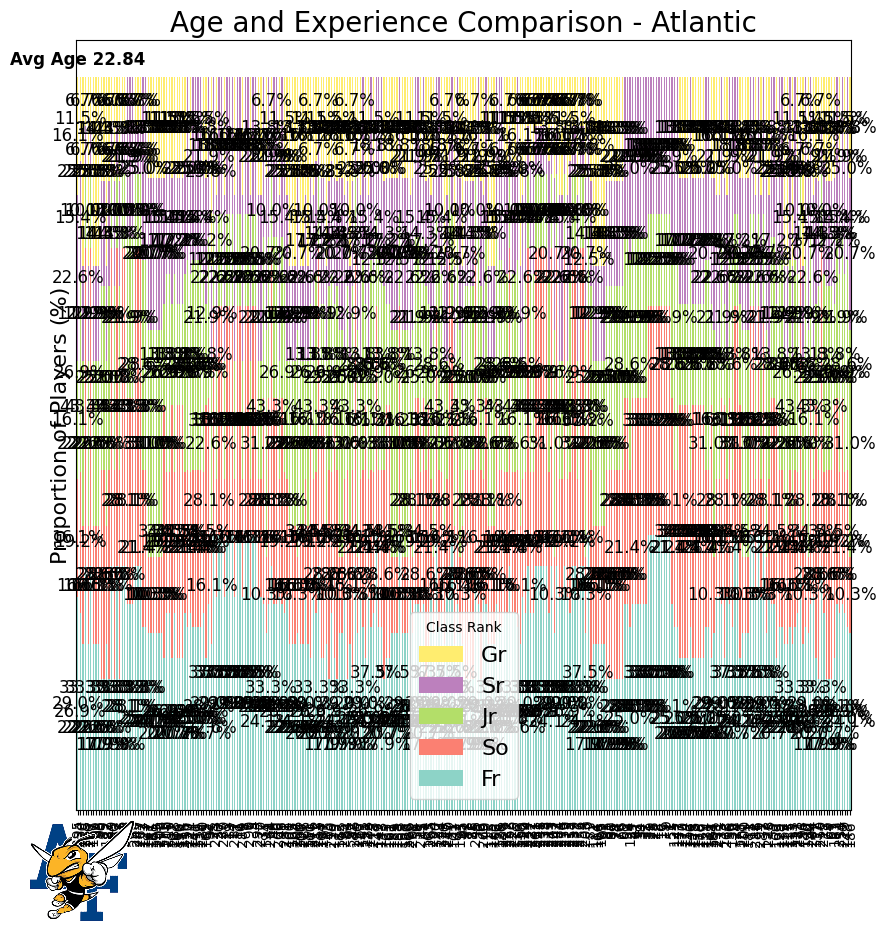

In [151]:
# (roster dataframe, team dictionary[f'(team dictionary)'], f'{team dictionary}', logo_mapping, logo_folder))
# print(roster.info())

# # Filter Roster down to just teams in the Atlantic Conference
# roster = roster[roster['Team'].isin(atlantic)]

# print(roster.info())



# Plot the age and experience comparison for the Atlantic teams
plot_team_ages_and_experience_with_logos(atlantic_roster, atlantic, 'Atlantic', logo_mapping, logo_folder, figure_size=figure_size)

In [ ]:
print(roster_df.columns)
print(roster.columns)

